In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Walmart.csv')

In [3]:
df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

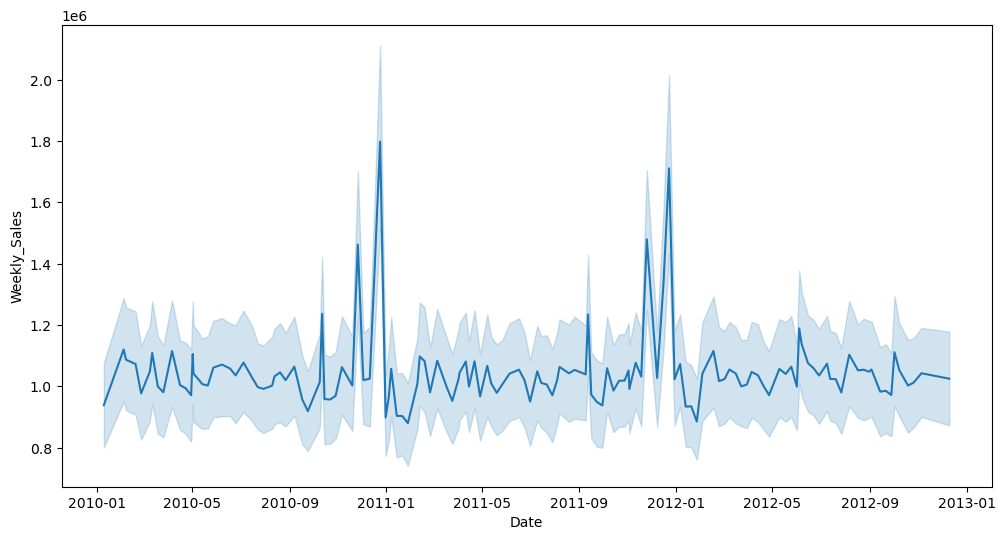

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)

In [5]:
df.drop(columns=['Date'],inplace=True)

In [6]:
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  weekday  month  year  
0         8.106        6      5  2010  
1         8.106        3     12  2010  
2         8.106        4      2  2010  
3         8.106        4      2  2010  
4         8.106        0      5  2010

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [8]:
df[df.duplicated]

Empty DataFrame
Columns: [Store, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment, weekday, month, year]
Index: []

In [9]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment      weekday        month         year  
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151     3.573427     6.475524  2010.965035  
std      39.356712      1.875885     1.426581     3.321797     0.797019  
min     126.064000      3.879000     0.000000     1.000000  2010.000000  
25%     131.735000      6.891000     4.000000     4.000000  2010.000000  
50%     182.616521      7.874000     4.000000     6.000000  2011.000000  
75%     212.743293      8.622000     4.000000     9.000000  2012.000000  
max     227.232807     14.313000     6.000000    12.000000  2012.000000

In [10]:
df.nunique()

Store             45
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
weekday            7
month             12
year               3
dtype: int64

In [11]:
df.corr()['Weekly_Sales']

Store          -0.335332
Weekly_Sales    1.000000
Holiday_Flag    0.036891
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
weekday        -0.021041
month           0.067535
year           -0.018378
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

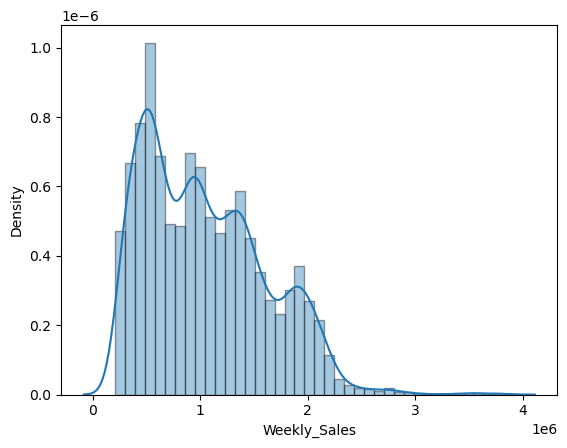

In [12]:
sns.distplot(df['Weekly_Sales'],hist_kws=dict(edgecolor="black"))

In [13]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

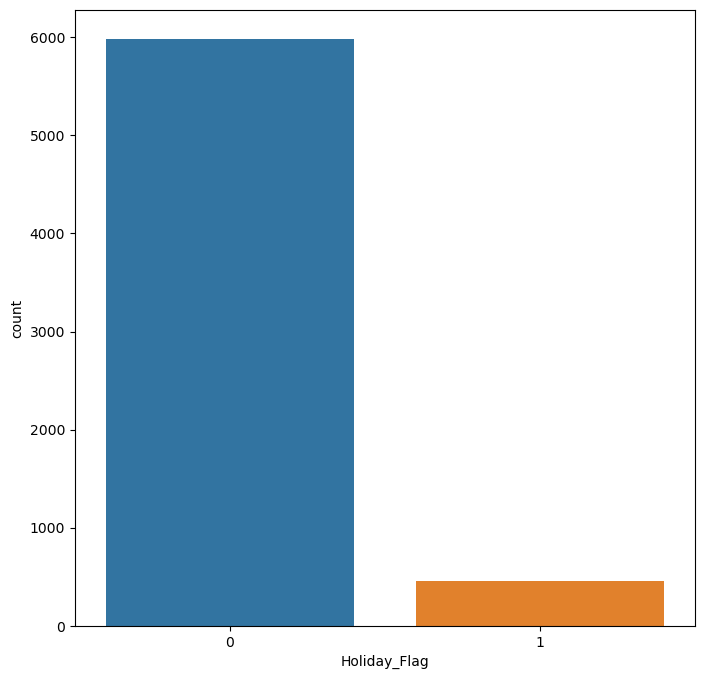

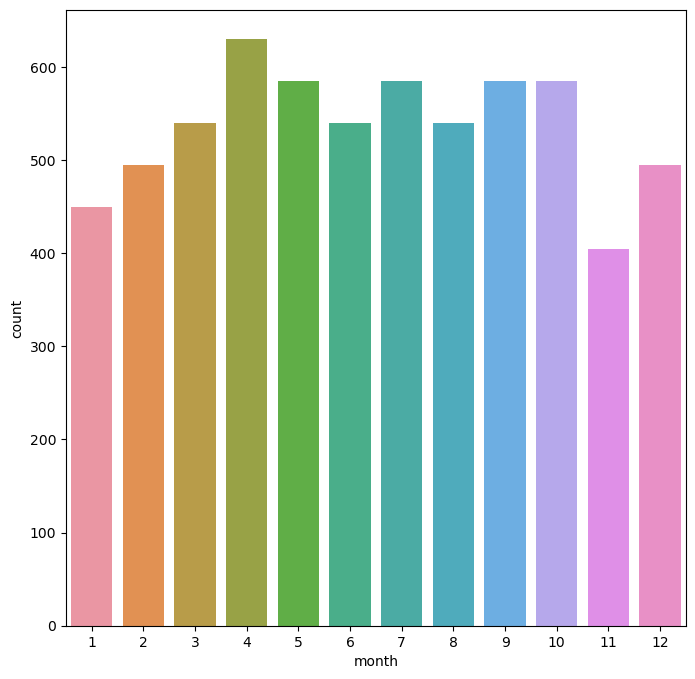

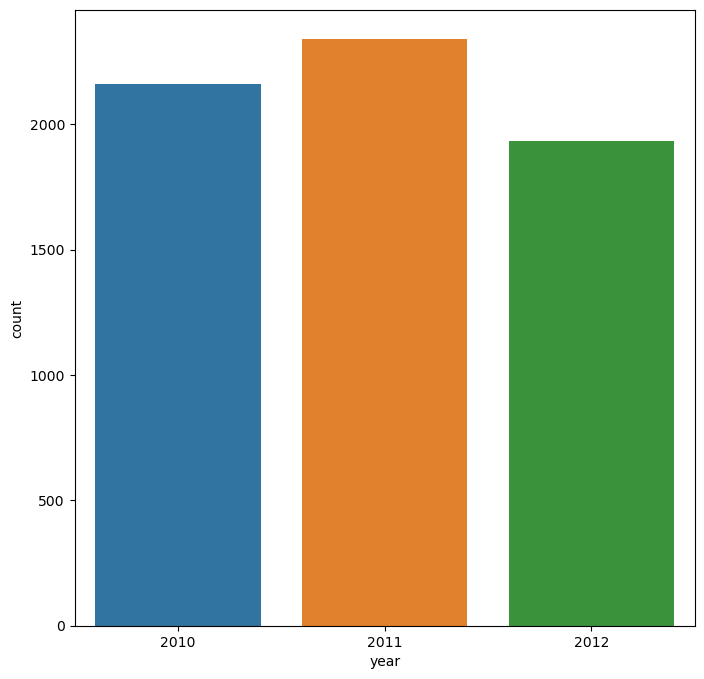

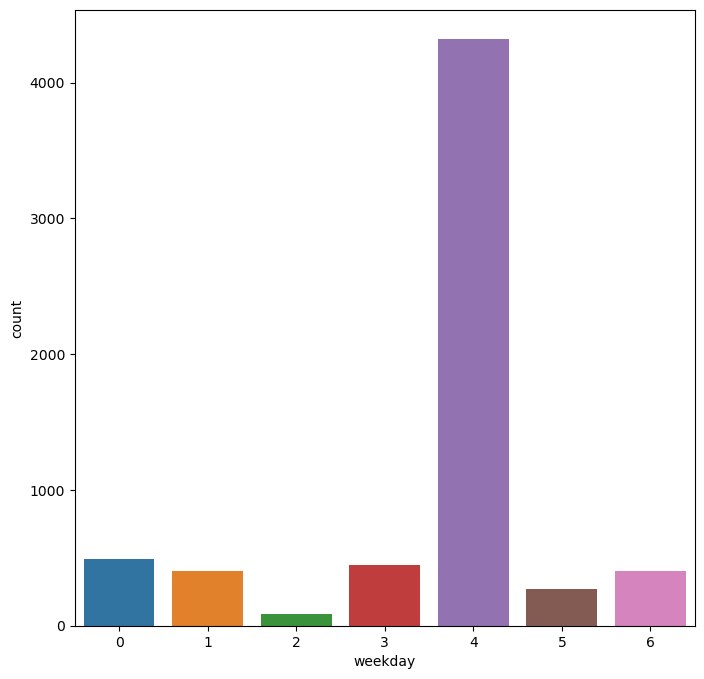

In [14]:
col=['Holiday_Flag','month','year','weekday']
for i in col:
    plt.figure(figsize=(8,8))
    sns.countplot(x=i,data=df)
    plt.show()

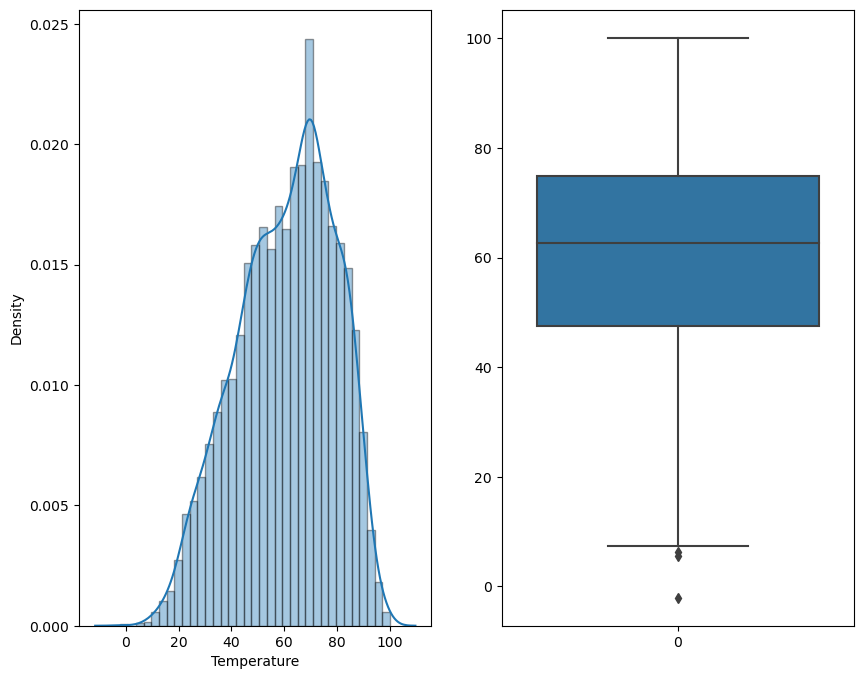

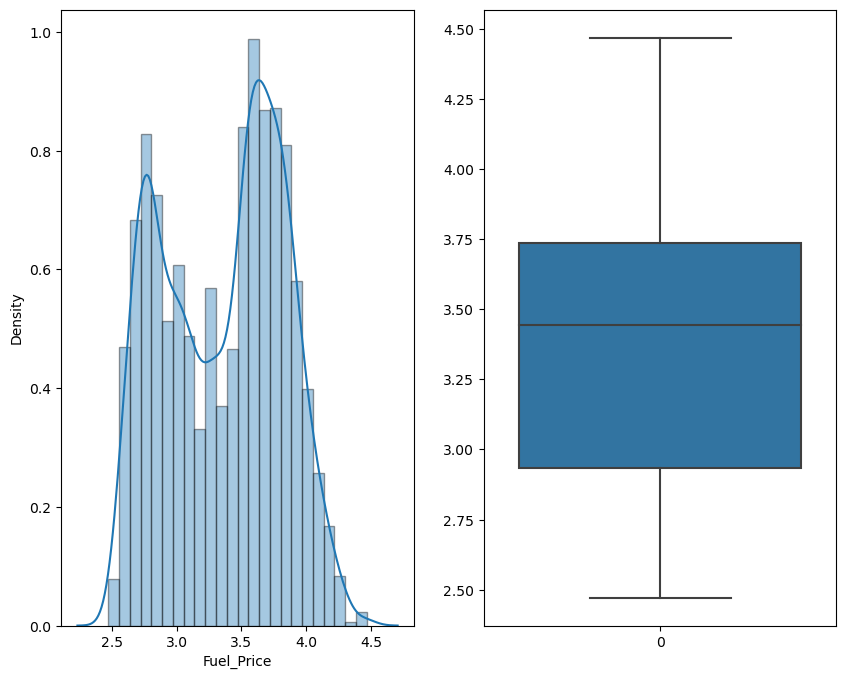

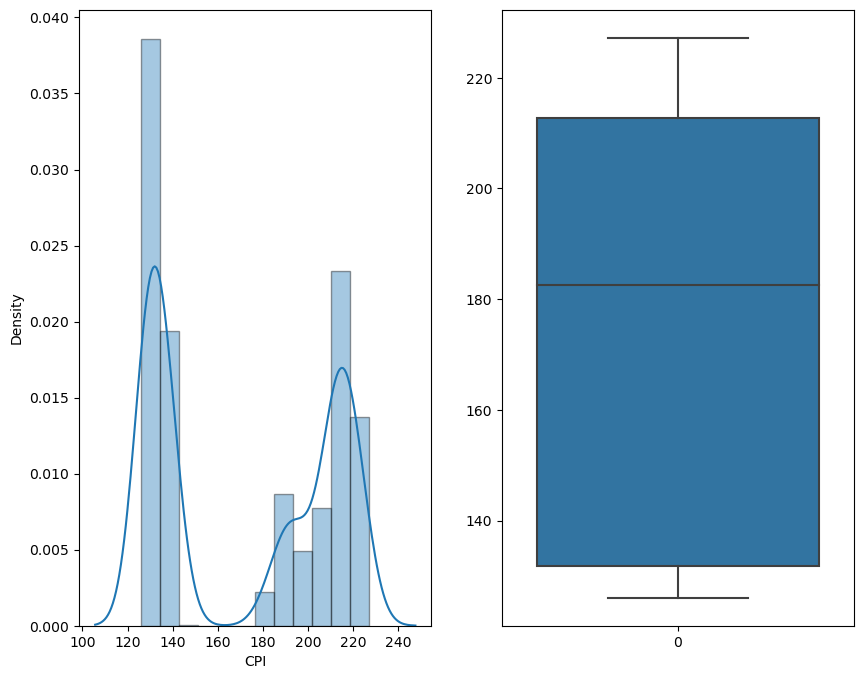

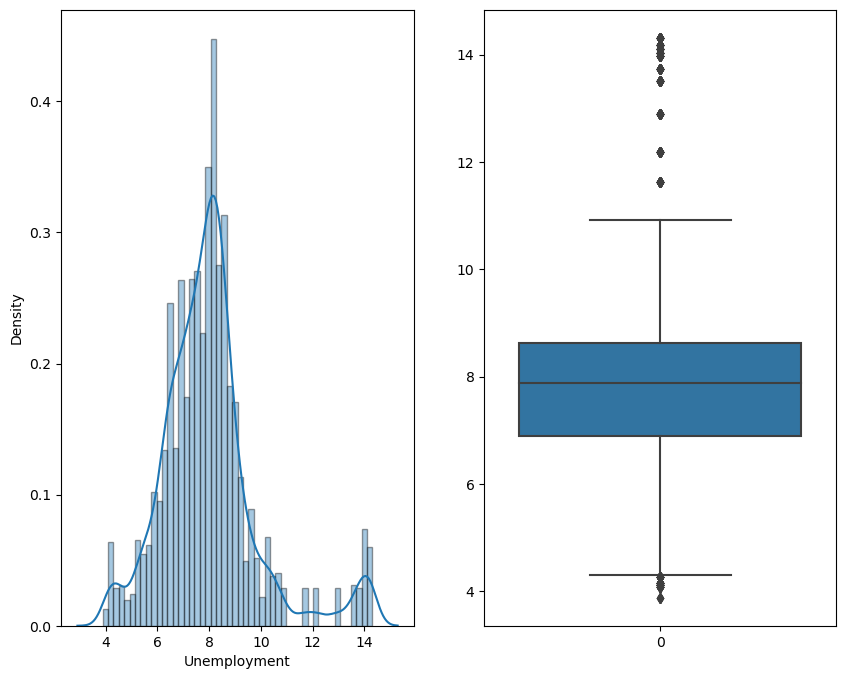

In [15]:
col=['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
for i in col:
    fig,axes=plt.subplots(ncols=2,figsize=(10,8))
    sns.distplot(df[i],ax=axes[0],hist_kws=dict(edgecolor="black"))
    sns.boxplot(df[i],ax=axes[1])
    plt.show()

<Axes: xlabel='weekday', ylabel='Weekly_Sales'>

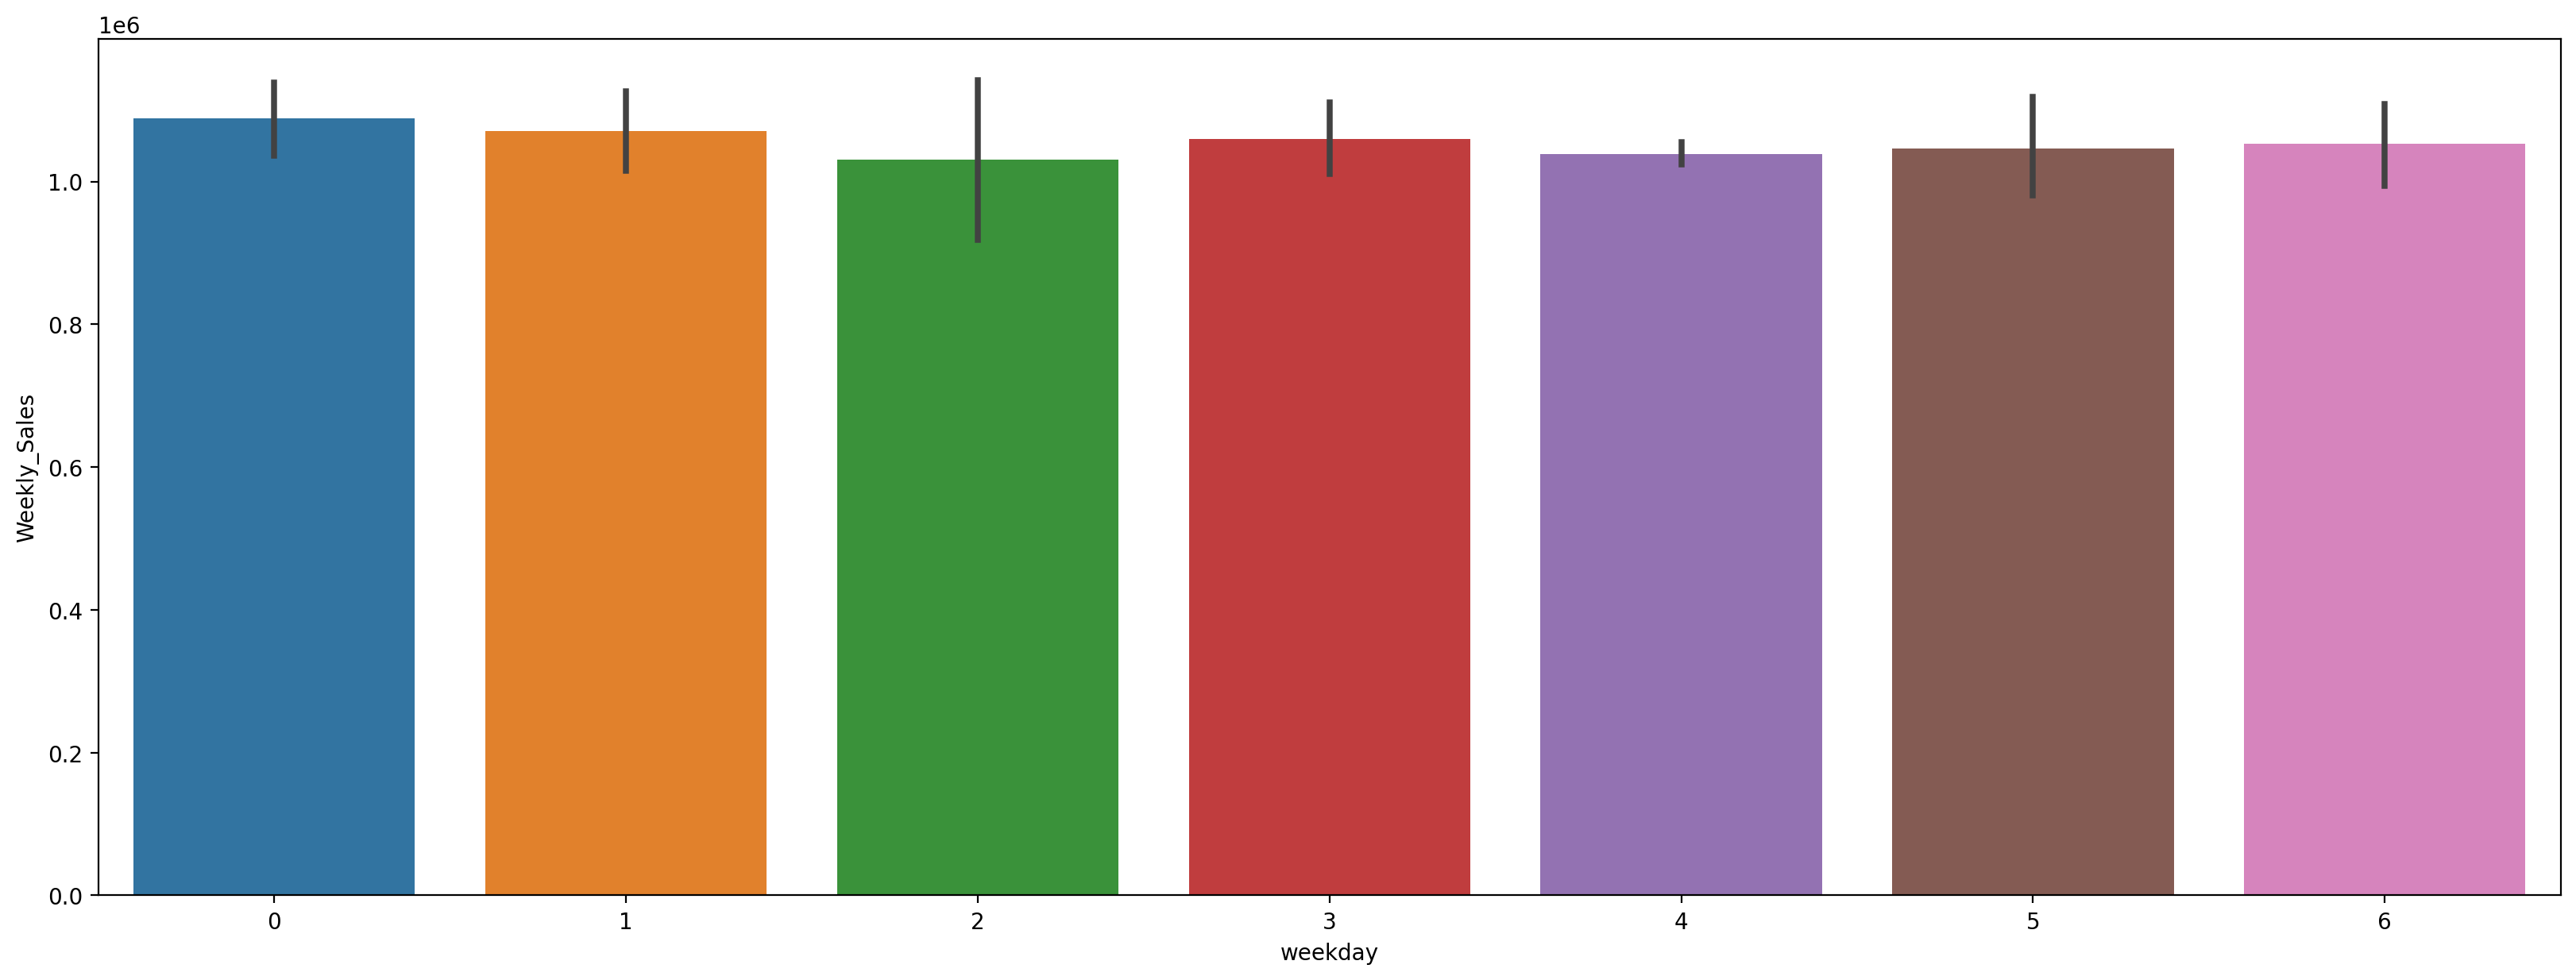

In [16]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,7),dpi=200)
sns.barplot(x='weekday',y='Weekly_Sales',data=df)

Text(0.5, 0, 'Store')

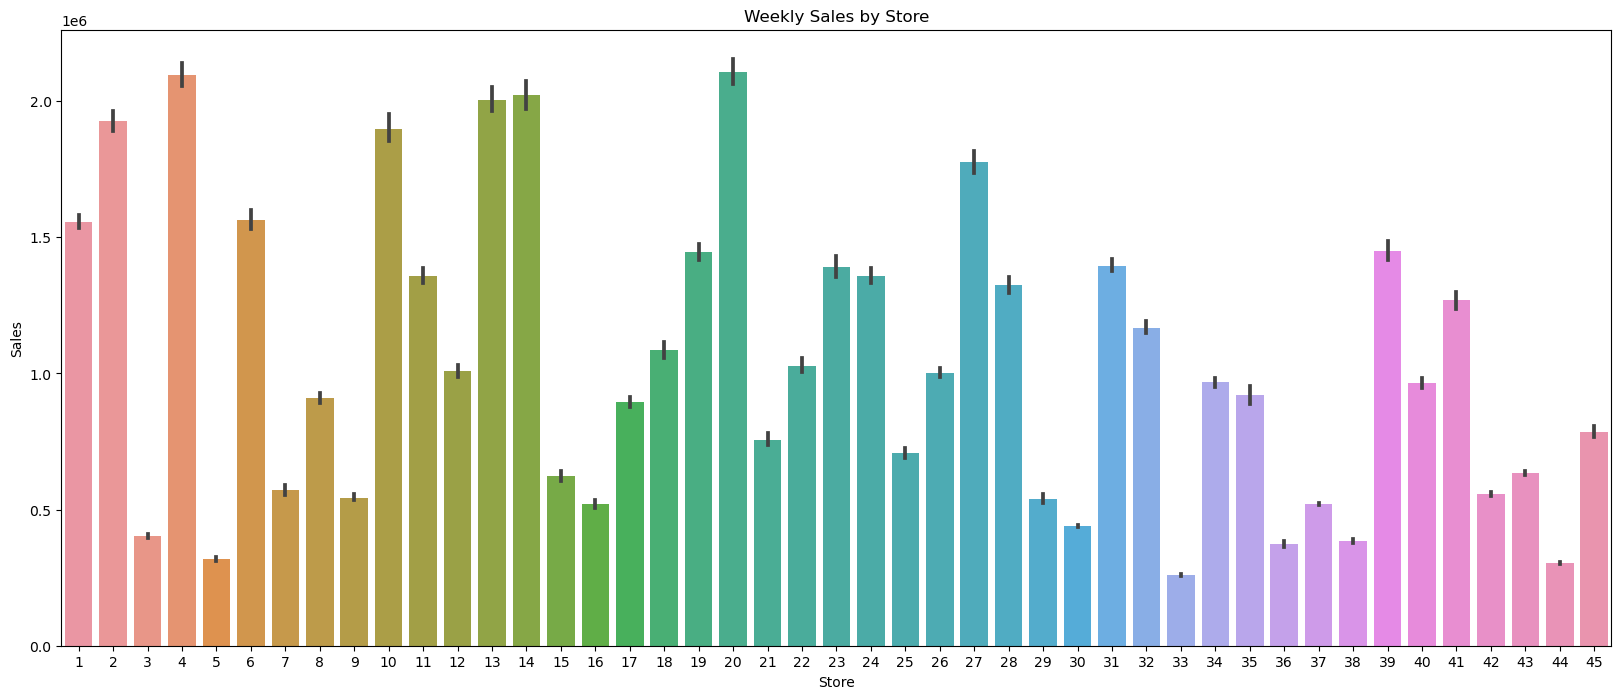

In [17]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.title('Weekly Sales by Store')
plt.ylabel('Sales')
plt.xlabel('Store')

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

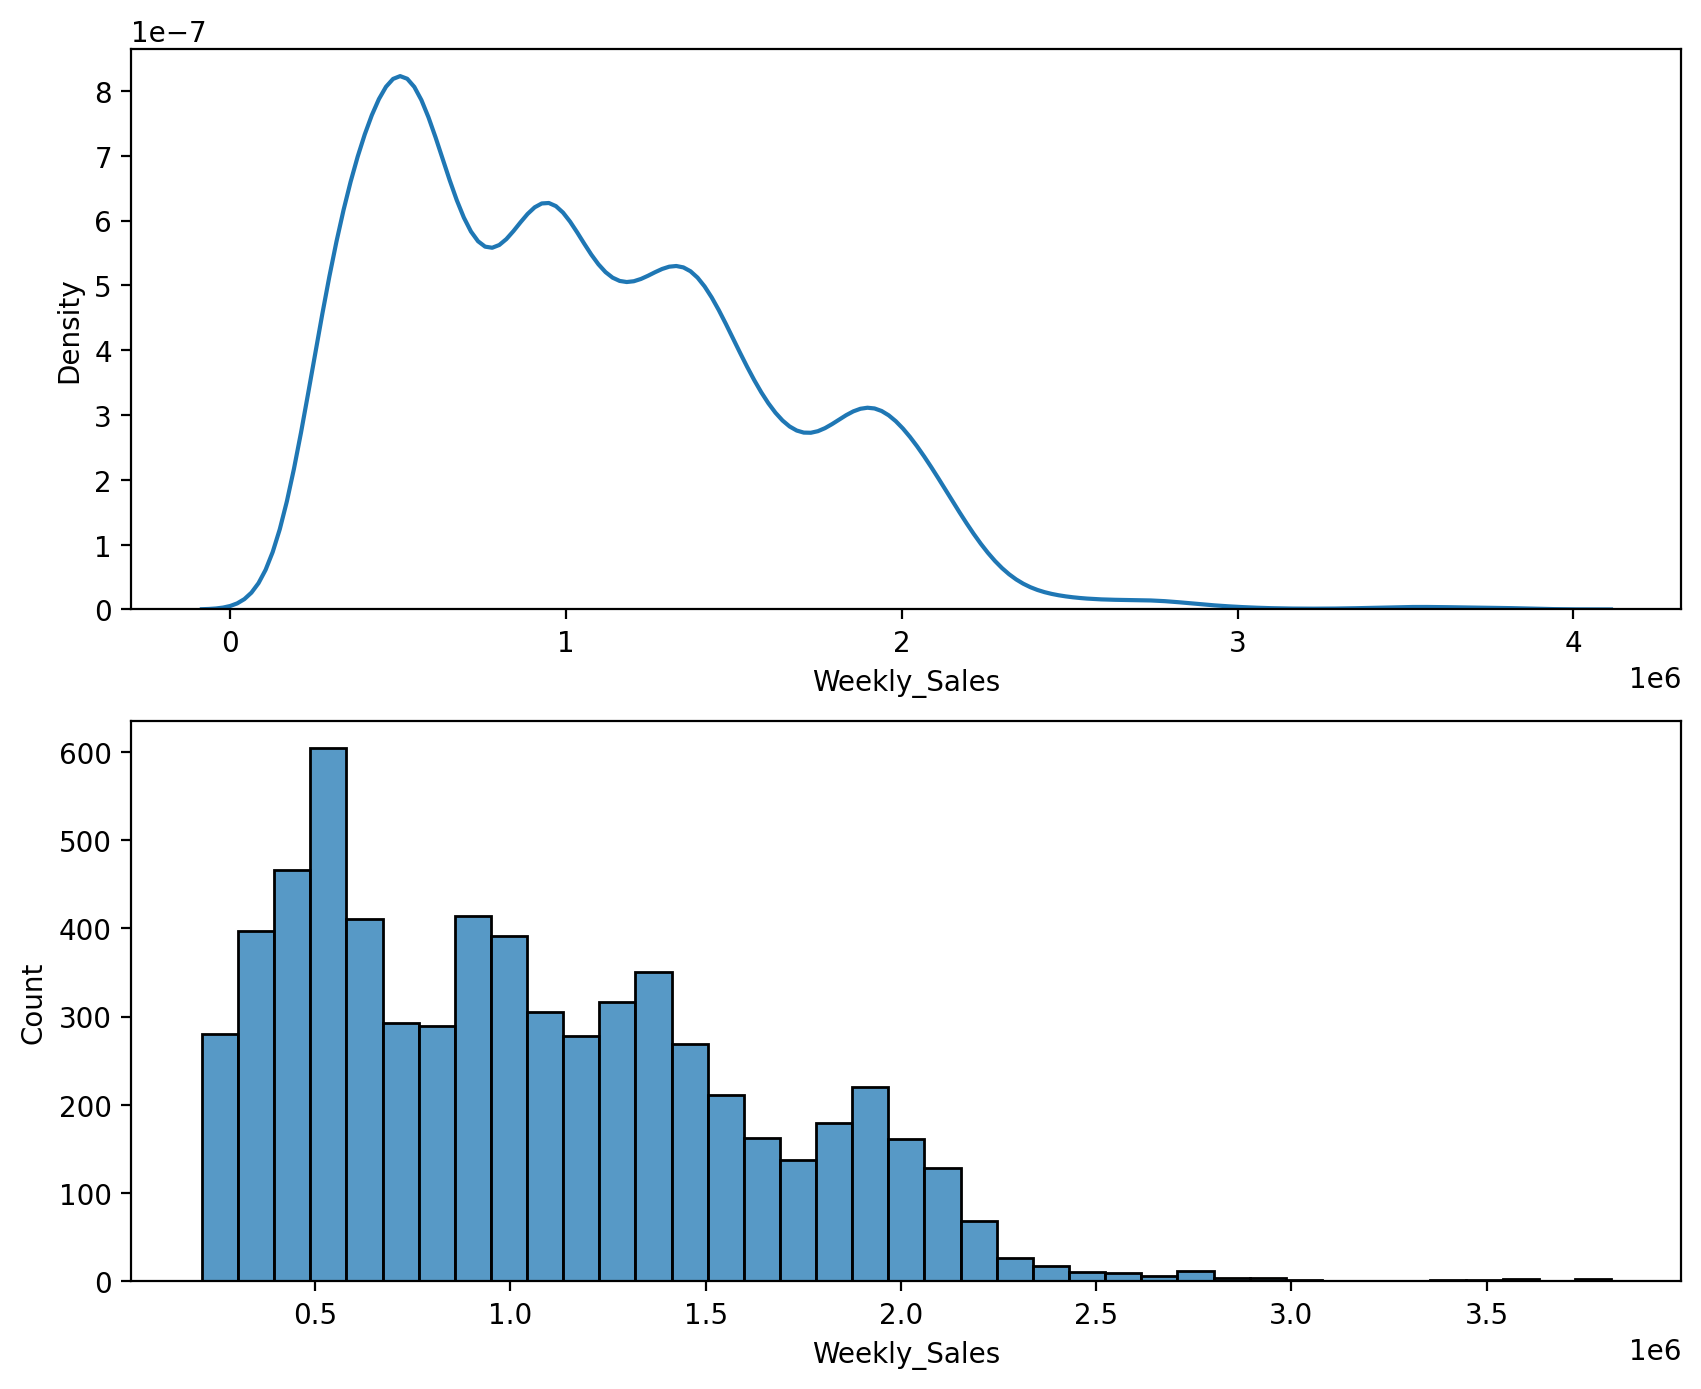

In [18]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,8),dpi=200)
sns.kdeplot(df['Weekly_Sales'],ax=axes[0])
sns.histplot(df['Weekly_Sales'],ax=axes[1])

<Axes: xlabel='month'>

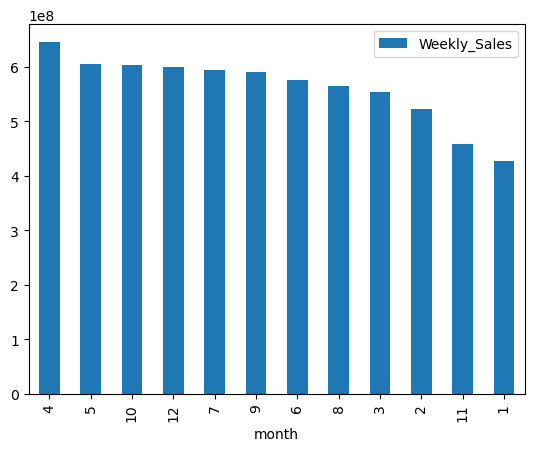

In [19]:
df[['month','Weekly_Sales']].groupby(['month']).sum().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

<Axes: xlabel='month'>

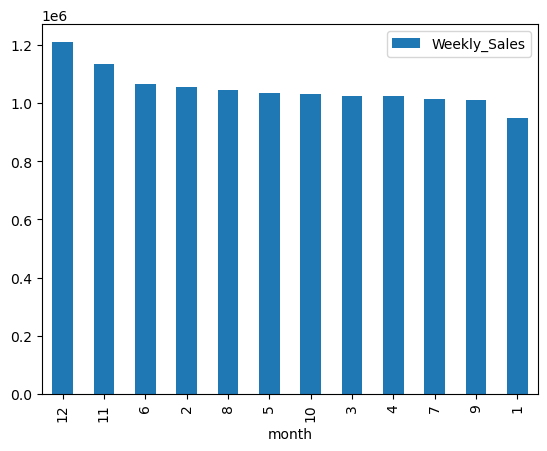

In [20]:
df[['month','Weekly_Sales']].groupby(['month']).mean().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

<Axes: xlabel='year'>

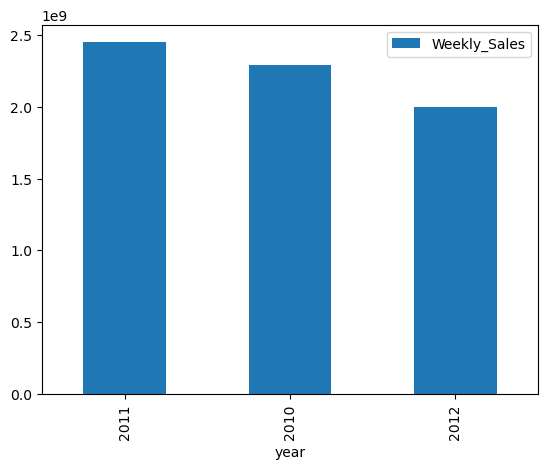

In [21]:
df[['year','Weekly_Sales']].groupby(['year']).sum().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

<Axes: xlabel='year'>

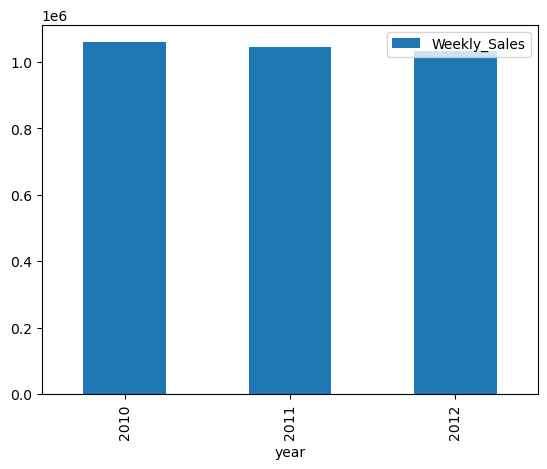

In [22]:
df[['year','Weekly_Sales']].groupby(['year']).mean().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

<Axes: xlabel='weekday'>

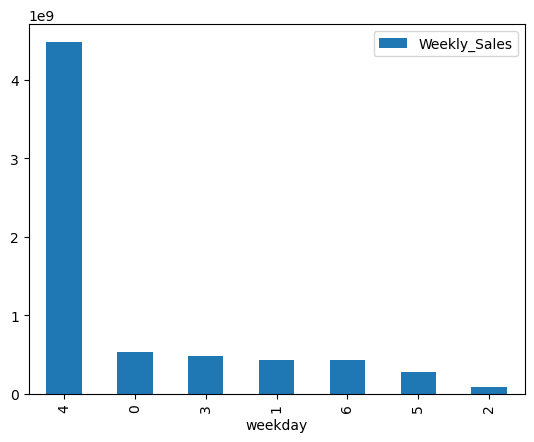

In [23]:
df[['weekday','Weekly_Sales']].groupby(['weekday']).sum().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

<Axes: xlabel='weekday'>

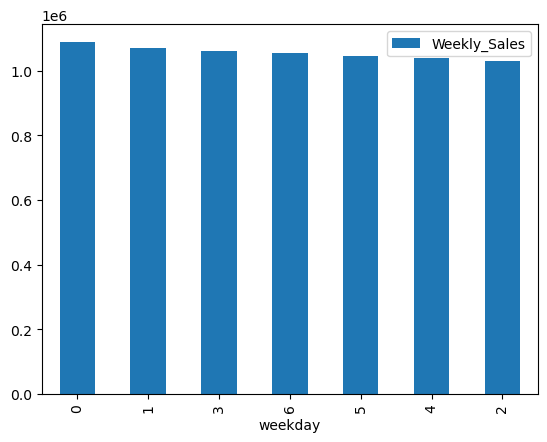

In [24]:
df[['weekday','Weekly_Sales']].groupby(['weekday']).mean().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

In [25]:
col=['weekday', 'month', 'year','Store']
convert_weekday=pd.get_dummies(df['weekday'],drop_first=True,prefix=str('weekday'))
convert_month=pd.get_dummies(df['month'],drop_first=True,prefix=str('month'))
convert_year=pd.get_dummies(df['year'],drop_first=True,prefix=str('year'))
convert_store=pd.get_dummies(df['Store'],drop_first=True,prefix=str('Store'))
df=pd.concat([df,convert_weekday,convert_month,convert_year,convert_store],axis=1)

In [26]:
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  weekday  month  year  ...  Store_36  Store_37  Store_38  \
0         8.106        6      5  2010  ...         0         0         0   
1         8.106        3     12  2010  ...         0         0         0   
2         8.106        4      2  2010  ...         0         0         0   
3         8.106        4      2  2010  ...         0         0         0   
4         8.106        0      5  2010  ...         0         0         0   

   Store_39  Store_40  Store_41  Store_42  Store_43  Store_44  Store_45  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 73 columns]

In [27]:
col=['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
for i in col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[i] <= (Q3+(1.5*IQR))]
    df = df[df[i] >= (Q1-(1.5*IQR))]
    df = df.reset_index(drop=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 73 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5923 non-null   int64  
 1   Weekly_Sales  5923 non-null   float64
 2   Holiday_Flag  5923 non-null   int64  
 3   Temperature   5923 non-null   float64
 4   Fuel_Price    5923 non-null   float64
 5   CPI           5923 non-null   float64
 6   Unemployment  5923 non-null   float64
 7   weekday       5923 non-null   int64  
 8   month         5923 non-null   int64  
 9   year          5923 non-null   int64  
 10  weekday_1     5923 non-null   uint8  
 11  weekday_2     5923 non-null   uint8  
 12  weekday_3     5923 non-null   uint8  
 13  weekday_4     5923 non-null   uint8  
 14  weekday_5     5923 non-null   uint8  
 15  weekday_6     5923 non-null   uint8  
 16  month_2       5923 non-null   uint8  
 17  month_3       5923 non-null   uint8  
 18  month_4       5923 non-null 

In [29]:
df.drop(columns=['weekday', 'month', 'year','Store'],inplace=True)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [31]:
vif_df=df.drop(columns=['Weekly_Sales'])
vif_data=pd.DataFrame()
vif_data['features']=vif_df.columns
vif_data['VIF']=[vif(vif_df.values,i)for i in range(len(vif_df.columns))]
vif_data.sort_values(by='VIF',ascending=False)
vif_data[vif_data['VIF']>9].sort_values(by='VIF',ascending=False)

features         VIF
3            CPI  518.546940
4   Unemployment  431.542678
2     Fuel_Price  424.882088
1    Temperature   32.098186
23     year_2012   14.023901
22     year_2011   10.825464
8      weekday_4   10.684848

In [32]:
vif_df=df.drop(columns=['Weekly_Sales','CPI'])
vif_data=pd.DataFrame()
vif_data['features']=vif_df.columns
vif_data['VIF']=[vif(vif_df.values,i)for i in range(len(vif_df.columns))]
vif_data.sort_values(by='VIF',ascending=False)
vif_data[vif_data['VIF']>9].sort_values(by='VIF',ascending=False)

features         VIF
2     Fuel_Price  339.911945
3   Unemployment  163.228273
1    Temperature   32.054367
22     year_2012   13.712637
21     year_2011   10.708573
7      weekday_4   10.477504

In [33]:
vif_df=df.drop(columns=['Weekly_Sales','CPI','Fuel_Price'])
vif_data=pd.DataFrame()
vif_data['features']=vif_df.columns
vif_data['VIF']=[vif(vif_df.values,i)for i in range(len(vif_df.columns))]
vif_data.sort_values(by='VIF',ascending=False)
vif_data[vif_data['VIF']>9].sort_values(by='VIF',ascending=False)

features        VIF
2  Unemployment  71.611580
1   Temperature  25.505387
6     weekday_4  10.477191

In [34]:
vif_df=df.drop(columns=['Weekly_Sales','CPI','Fuel_Price','Unemployment'])
vif_data=pd.DataFrame()
vif_data['features']=vif_df.columns
vif_data['VIF']=[vif(vif_df.values,i)for i in range(len(vif_df.columns))]
vif_data.sort_values(by='VIF',ascending=False)
vif_data[vif_data['VIF']>9].sort_values(by='VIF',ascending=False)

features        VIF
1  Temperature  21.765305
5    weekday_4   9.174616

In [35]:
vif_df=df.drop(columns=['Weekly_Sales','CPI','Fuel_Price','Unemployment','Temperature'])
vif_data=pd.DataFrame()
vif_data['features']=vif_df.columns
vif_data['VIF']=[vif(vif_df.values,i)for i in range(len(vif_df.columns))]
vif_data.sort_values(by='VIF',ascending=False)
vif_data[vif_data['VIF']>9].sort_values(by='VIF',ascending=False)

Empty DataFrame
Columns: [features, VIF]
Index: []

In [36]:
X=df.drop(columns=['Weekly_Sales','CPI','Fuel_Price','Unemployment','Temperature'],axis=1)
y=df['Weekly_Sales']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [40]:
from sklearn.metrics import *

In [41]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),XGBRegressor(),KNeighborsRegressor()]
for i in models:
    print(f"Model:{i}")
    model=i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"MAE:{mean_absolute_error(y_test,y_pred)}")
    print(f"MSE:{mean_squared_error(y_test,y_pred)}")
    print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}")
    print(f"R2-score:{r2_score(y_test,y_pred)}")
    print("\n")

Model:LinearRegression()
MAE:85108.9565197335
MSE:16716666581.457407
RMSE:129292.948691943
R2-score:0.9463440807904251


Model:DecisionTreeRegressor()
MAE:90562.67950806604
MSE:25213382715.10906
RMSE:158787.22465963394
R2-score:0.9190719501779978


Model:RandomForestRegressor()
MAE:79784.39591328391
MSE:18448008657.203617
RMSE:135823.4466401277
R2-score:0.940786947130571


Model:XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None

In [42]:
final_model=XGBRegressor()
final_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [43]:
y_pred=final_model.predict(X_test)
print(f"MAE:{mean_absolute_error(y_test,y_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_pred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2-score:{r2_score(y_test,y_pred)}")

MAE:78660.64401484243
MSE:17136708933.48482
RMSE:130907.25317370622
R2-score:0.9449958599357972
